# Modifying images

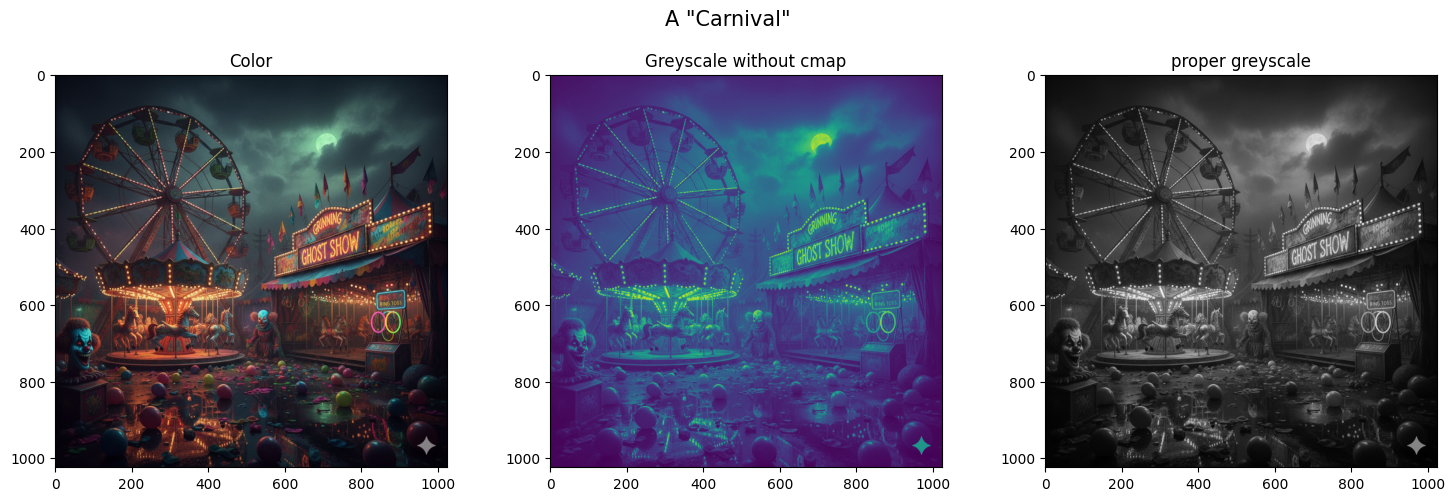

In [ ]:
# Image stuff
import matplotlib.pyplot as plt
from PIL import Image

image_name = 'notHappyCarnival.jpg'
# Another image file: happyCarnival.jpg

img = Image.open(image_name)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(img)
axs[1].imshow(img.convert("L")) # Don't forget the cmap 
#(This convert is not how you will do it for the project)
axs[2].imshow(img.convert("L"), cmap='gray') 

fig.suptitle('A "Carnival"', fontsize=15)
axs[0].set_title('Color')
axs[1].set_title('Greyscale without cmap')
axs[2].set_title('proper greyscale')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#plt.tight_layout()

plt.show()

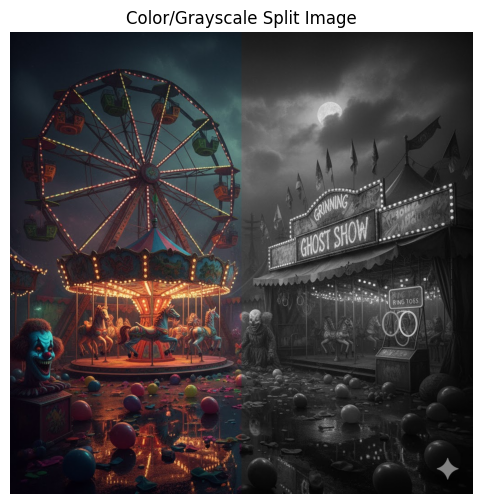

In [2]:
#more Image fun- split color and greyscale
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image_name = 'notHappyCarnival.jpg'
img_col = Image.open(image_name)
img_gry = img_col.convert("L")

width, height = img_col.size

#integer division with // (whole number at the end no matter what)
#5/2 = 2.5, 5//2 = 2
split_point = width // 2

left_half_col = np.array(img_col.crop((0, 0, split_point, height)))
right_half_gry = np.array(img_gry.crop((split_point, 0, width, height)))

#Stacking is like appending, just with full arrays instead
right_half_gry_stack = np.stack([right_half_gry] * 3, axis=2)

#horizontal stack, adds to each row instead of the end
final_image = np.hstack((left_half_col, right_half_gry_stack))

plt.figure(figsize=(12, 6))
plt.imshow(final_image)
plt.title("Color/Grayscale Split Image")
plt.axis('off')
plt.show() 


In [ ]:
# You can split images without the image library too
# (like for your project and work with the pixels individually)

img = plt.imread(file_name)

#check if image formatting is correct 

# if the  img.dtype is not np.float32 and/or img.dtype is not np.float64
# Take the rgb values from 0-255 to 0-1

#find the middle of the image with img.shape
height, width, channels = img.shape

#split the image in half

left_half_color = img[:, :split_point, :] #notice the colon location in the middle
right_half_color = img[:, split_point:, :]

#How do we calcualte luminance?
#L = ____*R + ___*G + ___*B
#Might be worth storing the rgb weigts in an array... (np array will make math faster)
#grayscale_weights = np.array([r,g,b])

#combine in single scalr with dot prodcut
#Can np do that for us?
#luminance = np. ...

#Once you have a luminance for each pixel, stack it 3x so each rgb pixel has instructions
right_half_grey = np.stack([luminance] * 3, axis=2)

#Stack the color and grey image next to eachother
final_image = np.hstack((left_half_color, right_half_grey))
